<a href="https://www.kaggle.com/code/soroush190/eda-to-production-analysis?scriptVersionId=109479355" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/production-scarap/Plant Scrap  Detail and Summary by Dept.xlsx
/kaggle/input/production-detaile/Production Details by PlanDate for Dept.xlsx


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb
import sklearn
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")


In [3]:
df_detail=pd.read_excel("../input/production-detaile/Production Details by PlanDate for Dept.xlsx")

In [4]:
df_Scarap=pd.read_excel("../input/production-scarap/Plant Scrap  Detail and Summary by Dept.xlsx")

In [5]:
df_detail.sort_values(by='plan_date')

,Departement,plan_date,Run_Date,SO_Item,Die_Copy,SO_Status,Order_Pc,Order_Wt,Remain_Pc,Reamain_Wt,...,Machine,Alloy,FineCode,Routing,Customer name,Salesman,Acked_Date,City,Shipped_Pc,Shipped_Wt
0,EXTRUDE,2020-01-01,2019-12-18,71451-2,1002-3,H,400,1792,0,0,...,1,6005A,0,MILL,Starline Architectural Windows Ltd,Customer Service,2019-11-27 15:21:00,Surrey,439,2040
20,EXTRUDE,2020-01-01,2019-12-21,71684-3,2918-1,H,74,456,0,0,...,1,6063,DBI,ANODIZED AZO THERMAL,Milgard Manufacturing Incorporated,Owen Anderson,2019-12-19 13:53:00,Tacoma,74,455
19,EXTRUDE,2020-01-01,2019-12-20,71684-2,2917-1,H,68,460,0,0,...,1,6063,CLII,ANODIZED AZO THERMAL,Milgard Manufacturing Incorporated,Owen Anderson,2019-12-19 13:53:00,Tacoma,63,427
18,EXTRUDE,2020-01-01,2019-12-20,71684-1,2916-2,H,66,463,0,0,...,2,6063,DBI,ANODIZED AZO THERMAL,Milgard Manufacturing Incorporated,Owen Anderson,2019-12-19 13:53:00,Tacoma,61,427
17,EXTRUDE,2020-01-01,2019-12-14,71591-1,2664-6,H,344,1846,0,0,...,2,6063,DBI,ANODIZED AZO THERMAL,Milgard Manufacturing Incorporated,Owen Anderson,2019-12-11 14:35:00,Tacoma,369,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27240,EXTRUDE,2022-12-17,2022-10-26,81053-12,4709-1,B,200,3300,200,3301,...,2,6063,789G048A,PAINT,"Aurora Systems, Inc.",Owen Anderson,2022-03-31 07:54:00,Everett,0,0
27241,EXTRUDE,2022-12-18,2022-10-26,81053-9,4718-1,B,125,1217,125,1210,...,1,6063,789G048A,PAINT,"Aurora Systems, Inc.",Owen Anderson,2022-03-31 07:54:00,Everett,0,0
27242,EXTRUDE,2022-12-21,2022-10-26,81912-2,2913-1,E,7500,568,75,547,...,1,6063,0,T-CLIP PTI,Engineered Assemblies Inc.,Ron Rehwald,2022-06-14 11:38:00,Langley,1488,68
27243,EXTRUDE,2022-12-28,2022-10-26,83137-1,3814-1,B,91,480,91,481,...,1,6061,0,LINE MARK,AJ Forsyth Specialty Metals,Ron Rehwald,2022-10-21 16:10:00,Surrey,0,0


## Data is productions orders 1,1,2021 until 12,30,2022 (2 years)

In [6]:
df_detail["Month"]=df_detail.Run_Date.dt.month

In [7]:
df_detail.describe().Month[0]

27245.0

In [8]:
df_detail.isnull().sum()

Departement       0
plan_date         0
Run_Date          0
SO_Item           0
Die_Copy          0
SO_Status         0
Order_Pc          0
Order_Wt          0
Remain_Pc         0
Reamain_Wt        0
Run_Pc            0
Run_Wt            0
Completed(%)      0
Due_Date          1
Machine           0
Alloy             0
FineCode          0
Routing           0
Customer name     0
Salesman         17
Acked_Date        0
City             25
Shipped_Pc        0
Shipped_Wt        0
Month             0
dtype: int64

In [9]:
df_detail.dropna(inplace=True)
df_detail.isnull().sum()

Departement      0
plan_date        0
Run_Date         0
SO_Item          0
Die_Copy         0
SO_Status        0
Order_Pc         0
Order_Wt         0
Remain_Pc        0
Reamain_Wt       0
Run_Pc           0
Run_Wt           0
Completed(%)     0
Due_Date         0
Machine          0
Alloy            0
FineCode         0
Routing          0
Customer name    0
Salesman         0
Acked_Date       0
City             0
Shipped_Pc       0
Shipped_Wt       0
Month            0
dtype: int64

In [10]:
df_detail.dtypes

Departement              object
plan_date        datetime64[ns]
Run_Date         datetime64[ns]
SO_Item                  object
Die_Copy                 object
SO_Status                object
Order_Pc                  int64
Order_Wt                  int64
Remain_Pc                 int64
Reamain_Wt                int64
Run_Pc                    int64
Run_Wt                    int64
Completed(%)            float64
Due_Date         datetime64[ns]
Machine                   int64
Alloy                    object
FineCode                 object
Routing                  object
Customer name            object
Salesman                 object
Acked_Date       datetime64[ns]
City                     object
Shipped_Pc                int64
Shipped_Wt                int64
Month                     int64
dtype: object

In [11]:
df_detail.describe()

,Order_Pc,Order_Wt,Remain_Pc,Reamain_Wt,Run_Pc,Run_Wt,Completed(%),Machine,Shipped_Pc,Shipped_Wt,Month
count,27208.000000,27208.000000,27208.000000,27208.000000,27208.000000,27208.00000,27208.000000,27208.000000,27208.000000,27208.000000,27208.000000
mean,419.613312,1136.892127,12.444722,57.737063,288.909659,1237.96648,96.051883,1.312812,411.884850,1146.145472,6.297780
std,1693.185547,1654.864104,134.410120,943.532648,591.906987,1635.74090,19.383349,0.463726,1694.732636,1510.316430,3.314532
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,80.000000,454.000000,0.000000,0.000000,79.000000,491.00000,100.000000,1.000000,74.000000,466.000000,3.000000
50%,150.000000,712.000000,0.000000,0.000000,144.000000,770.00000,100.000000,1.000000,145.000000,696.000000,6.000000
75%,319.000000,1219.000000,0.000000,0.000000,315.000000,1362.00000,100.000000,2.000000,320.000000,1247.000000,9.000000
max,80000.000000,138871.000000,5376.000000,138872.000000,36233.000000,35168.00000,100.000000,2.000000,89800.000000,35983.000000,12.000000


In [12]:
y=df_detail.groupby(by='Customer name').sum()['Order_Wt']
y_percent=y/(y.sum())
y_percent.sort_values(ascending=False,inplace=True)
x=df_detail.groupby(by='Month').sum()['Order_Wt']
alloy=df_detail.groupby(by='Alloy').sum()['Order_Wt']


In [13]:
customer_count=len(y_percent.index)
customer_count

230

In [14]:
suum=0
lis=[]
for i in y_percent:
    suum=i+suum
    lis.append(suum)
df=pd.DataFrame({"percent_of_all":y_percent,"comulative_Percentage":lis})
df.sort_values(by='comulative_Percentage',ascending=False)
df_top_Costumer=df[df['comulative_Percentage']<=.80]
df_top_Costumer=df_top_Costumer.round({"percent_of_all":3,"comulative_Percentage":3}).sort_values(by='comulative_Percentage',ascending=True)
df_top_Costumer["comulative_Percentage"]=df_top_Costumer["comulative_Percentage"]*100
df_top_Costumer.reset_index(inplace=True)
df_top_Costumer

,Customer name,percent_of_all,comulative_Percentage
0,Starline Architectural Windows Ltd,0.178,17.8
1,Milgard Manufacturing Incorporated,0.104,28.2
2,East & West Alum Craft Ltd.,0.059,34.2
3,Pacific Metal Company,0.056,39.8
4,Cooper B-Line USA,0.043,44.1
5,Rainier Industries,0.039,48.0
6,Phantom Mfg (Int'l) Ltd,0.025,50.6
7,Cooper Industries (Electrical) Inc.,0.025,53.0
8,Northwest Door LLC-MFG,0.022,55.2
9,Cendek Railings Ltd.,0.019,57.1


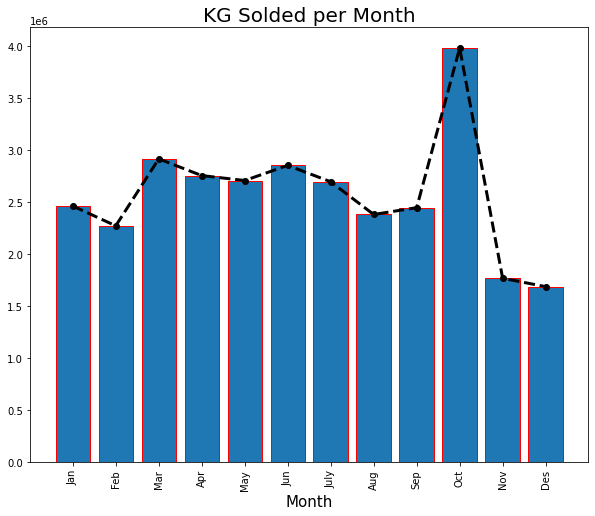

In [15]:
plt.figure(figsize=(10,8))
plt.bar(x.index,x,edgecolor="red")
plt.plot(x.index,x,'--bo',color="black",linewidth=3)
plt.title("KG Solded per Month",fontsize=20)
list_month=['Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Des']
plt.xticks(x.index,labels=list_month,rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Month",fontsize=15)
plt.show()


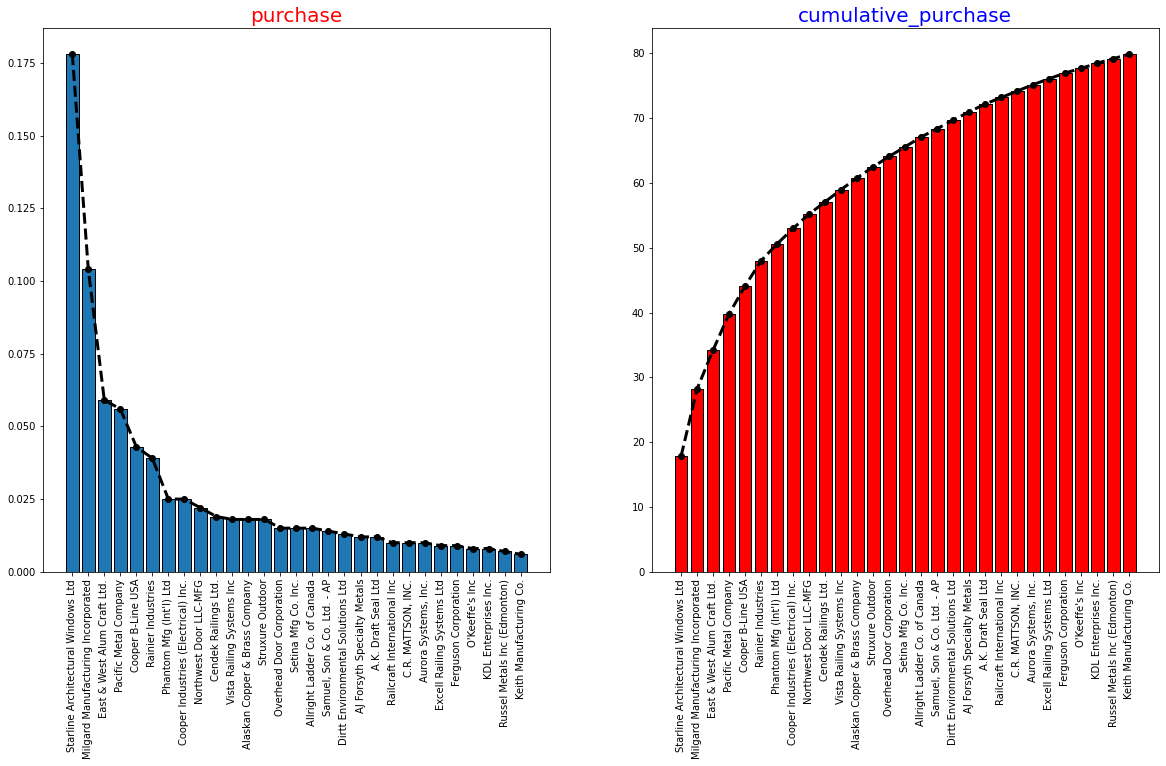

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.bar(df_top_Costumer['Customer name'],df_top_Costumer["percent_of_all"],edgecolor='black')
plt.plot(df_top_Costumer['Customer name'],df_top_Costumer['percent_of_all'],'--bo',color="black",linewidth=3)
plt.xticks(df_top_Costumer['Customer name'],rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.title("purchase",fontsize=20,color="red")

plt.subplot(1,2,2)
plt.plot(df_top_Costumer['Customer name'],df_top_Costumer['comulative_Percentage'],'--bo',color="black",linewidth=3)
plt.bar(df_top_Costumer['Customer name'],df_top_Costumer['comulative_Percentage'],color="red",edgecolor='black')
plt.xticks(df_top_Costumer['Customer name'],rotation=90,fontsize=10)
plt.title("cumulative_purchase",fontsize=20,color="blue")
plt.show()

### 80% of production is for 28 customers out of 230. and 50% of production belongs of 6 costumers.

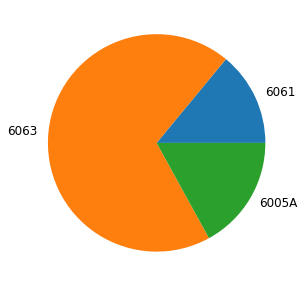

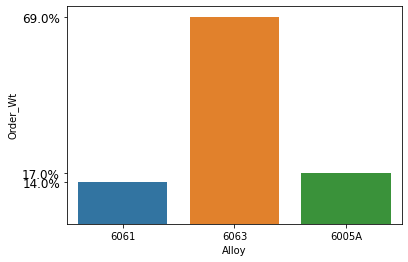

In [17]:
alloy_share=alloy/alloy.sum()*100
alloy_share=alloy_share.round(decimals=0)
alloy_share_str=alloy_share.astype('str')+"%"


plt.figure(figsize=(10,5))
plt.pie(alloy_share.values,labels=alloy_share.index,textprops={'fontsize': 12})
plt.show()

sb.barplot(x=alloy_share_str.index,y=alloy_share)
plt.xticks(fontsize=10)
plt.yticks(ticks=alloy_share.values,labels=alloy_share_str.values,fontsize=12)
plt.show()

## 69% of Orders are for alloy 6063 and hard alloys (6061 and 6063) have 31% proportions